Question 1: Analysis

In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt



df = pd.read_csv("Shopify.csv")
df.order_amount.describe()



count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [25]:
df.total_items.describe()

count    5000.00000
mean        8.78720
std       116.32032
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max      2000.00000
Name: total_items, dtype: float64

The describe method in pandas gives us the descriptive stastistics of the dataset.
The AOV of $3145.13 is quite high for sneaker business, this can be due to the high std in number of items in an order as well as the implication of having a high std in order_amount itself. The AOV does not taken into account of total items ordered in a given order which implies that orders of large number of items will likely result in higher AOV if all else is equal. The AOV is obtained from a simple mean calculation of the order amount in the data set which can be highly affected by the tails of its distribution as hinted by its high max. The order_amount has very high std which shows that mean is not suitable to describe this dataset. 
The high AOV intrigues me and I would like to look into the distribution of order amount. 


First, we shall look into the distribution of order amounts. We can see below that the extremly high order amount of $704000 ocurred 17 times which is highly unsual for the sneakers business. Besides that, as seen in the table containing the left tail of the dataset, the data has a heavy left skew. 

In [26]:
unique_amounts = df.groupby(['order_amount']).size().reset_index(name='count').sort_values(by='order_amount', ascending=False)
unique_amounts.head(20)


,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


In [27]:
unique_amounts.tail(20)

,order_amount,count
19,138,25
18,136,38
17,134,29
16,133,56
15,132,23
14,131,35
13,130,52
12,129,50
11,128,30
10,127,22


Looking further into the average cost of one pair of sneakers, we can see that the high occurance of the data point of $25725/item suggests that orders associated with such cost per item should be looked into. 
As observed, there seems to be no abnormality associated with the cost per item of the rest of the dataset. 

In [28]:
df['costperitem'] = df['order_amount'].divide(df['total_items'])
unique_amt = df.groupby(['costperitem']).size().reset_index(name='count').sort_values(by='costperitem', ascending=False)
unique_amt.head(20)


,costperitem,count
57,25725.0,46
56,352.0,51
55,201.0,53
54,196.0,61
53,195.0,54
52,193.0,44
51,190.0,35
50,187.0,105
49,184.0,49
48,181.0,112


In [29]:
unique_amt.tail(20)

,costperitem,count
19,138.0,59
18,136.0,105
17,134.0,86
16,133.0,151
15,132.0,46
14,131.0,97
13,130.0,150
12,129.0,142
11,128.0,93
10,127.0,52


The above count table shows that the most orders occur in the left tail. Hence, the distribution is left tail heavy and should not use mean AOV as a reporting metric. This is confirmed with a selective visualization of the dataset using cumulative histogram and histogram.

As we can see, over 95% of entries of order amounts are below 1200 and about 90% of orders have order_amount of within $600.

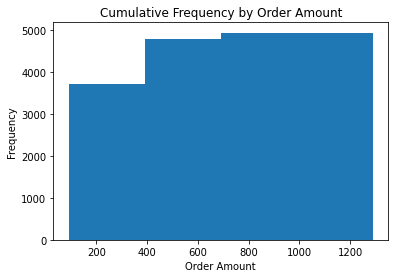

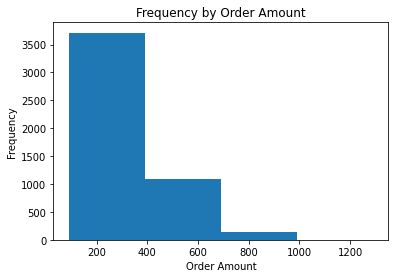

In [30]:
binslist = range(df.order_amount.min(),1500,300)

plt.hist(df.order_amount,bins = binslist, cumulative='True')
plt.gca().set(title='Cumulative Frequency by Order Amount', xlabel='Order Amount', ylabel ='Frequency')
plt.show()

plt.hist(df.order_amount,bins = binslist)
plt.gca().set(title='Frequency by Order Amount', xlabel='Order Amount', ylabel ='Frequency')
plt.show()


We should always clean up the dataset before analyzing. I will point out a few things I would like to look into in the dataset to ensure data quality:

As I have shown, the total_item has high std.   

In [31]:
unique_total_items = df.groupby(['total_items']).size().reset_index(name='count').sort_values(by='total_items', ascending=False)
unique_total_items.tail(10)

,total_items,count
7,2000,17
6,8,1
5,6,9
4,5,77
3,4,293
2,3,941
1,2,1832
0,1,1830


If some stores are wholesale sneakers store, it would make sense for customers to purchase 2000 pairs of sneakers at once. In that case, I would want to calculate AOV seperately for wholesale vs. retail.  Let's take a look into the transactions for 2000 pairs of sneakers.

In [32]:
df.loc[df['total_items'] == 2000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,costperitem
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0


The transactions above seem erraneous/fradulent as user '607' repetitively purchased 2000*17 pairs of sneakers valued at a grand total of $12 mil at 4 am. Unless this is verfied to be true, I would remove the above data from our data set. 


Furthermore, we should look into orders with a cost per item of $25725 as the cost per item is extremely high in comparison to the rest of the dataset.

In [33]:
df.loc[df['costperitem'] == 25725]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,costperitem
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


As read above, the orders with high cost per item of 25725 all originate from shop 78 and are paid with mostly with cash and debit. This is highly unusual in the dataset and can be indicative of illicit financial activities. The platform should look into the transactions. For the purpose of this case study, the entries will be removed from the dataset as outliers.
I choose to not remove the statistical outliers computed using IQR as such data is natural to the scenario that I am studying (Sales).

In [34]:
df = df[df['user_id']!=607]
df = df[df['shop_id']!=78]


See below for a descriptive summary of the dataset after the removal of outliers. 

In [35]:
df.order_amount.describe()


count    4937.000000
mean      302.580514
std       160.804912
min        90.000000
25%       163.000000
50%       284.000000
75%       387.000000
max      1760.000000
Name: order_amount, dtype: float64

<AxesSubplot:>

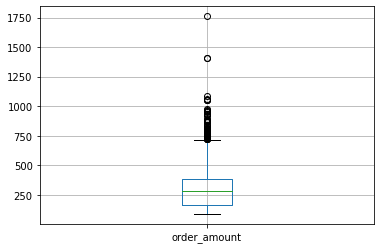

In [39]:
df.boxplot(column='order_amount')

The data now presents a heavy left skew with statistical outliers that is natural to the scenario.

Question 1 Answers:


a: 
AOV was calculated to be a simple mean of all orders which did not take into account of :
1. data quality : erraneous transactions / outliers were not removed before analysis.
2. total_items of a given order: most orders have items of less than 10 but there was a handful of transactions where total_items = 2000 as well as transactions with high costperitem. This can largely skew the AOV if not taken into account.

I would report the median of the data set as the dataset still has a long right tail which is natural. Median is less effected by skew. 

b. The metric I would report is median. 
The reason for choosing median over mode and mean is that :
1. the data has a heavy left skew and a long right tail which makes it not suitable to be reported using mean.
2. The data is ordinal and has a skew which is not suitable to be reported using mode. 



c. The median AOV is $284.


Question 2:

a: Answer: 54

In [ ]:
SELECT COUNT(*) AS num_order
FROM Orders as o
JOIN Shippers as s
    ON s.ShipperID = o.ShipperID
WHERE s.ShipperName = 'Speedy Express'

b:
Answer: Employee with last name 'Peacock'; 40 orders

In [ ]:
SELECT e.LastName, COUNT(*) AS num_orders
FROM Employees e 
JOIN Orders o 
    ON e.EmployeeID = o.EmployeeID
GROUP BY e.LastName
ORDER BY num_orders DESC
LIMIT 1;

c:
Answer: Boston Crab Meat;160

In [ ]:
SELECT p.ProductName,
    SUM(od.Quantity) AS "total_num_order"
FROM Orders AS o
JOIN Customers AS c
    ON c.CustomerID = o.CustomerID
JOIN OrderDetails AS od
    ON od.OrderID = o.OrderID
JOIN Products AS p
    ON p.ProductID = od.ProductID
WHERE c.Country = 'Germany'
GROUP BY od.ProductID
ORDER BY total_num_order DESC
LIMIT 1